# Spatially correlated random field - Weibull distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import pyrf

### Mesh

In [2]:
x = pyrf.build_mesh(5e-3, 50, 50)

Number of nodes: 2500


### Material properties

In [3]:
lc = 15          # Length scale
mean_fc = 42.3   # Mean compressive strength
std_dev = 5      # Standard deviation compressive strength

### Correlation Matrix

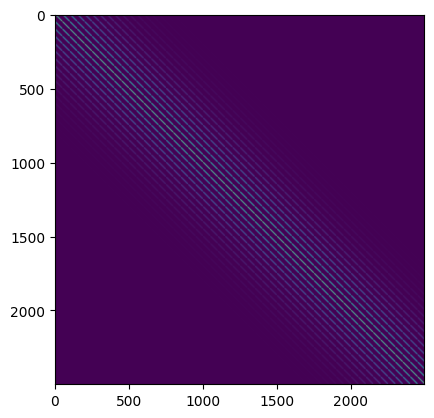

In [4]:
matern = pyrf.Matern(lc, nu=1/2)
C = matern.build_correlation_matrix(x)
matern.visualise(C)

### Draw a sample from the random field

In [5]:
weibull = pyrf.Weibull(mean_fc, std_dev, 5)
md = pyrf.MatrixDecomposition(C, weibull)

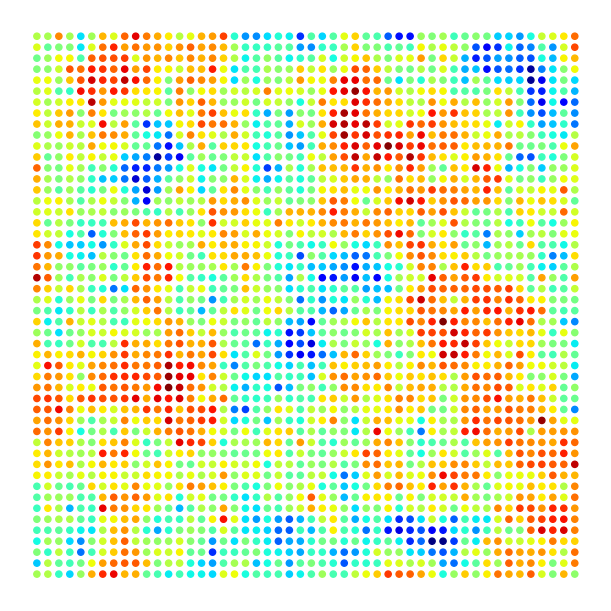

In [6]:
K = md.generate_sample()
md.visualise(x, K, sz=20);

#### Single sample: histogram of compressive strength

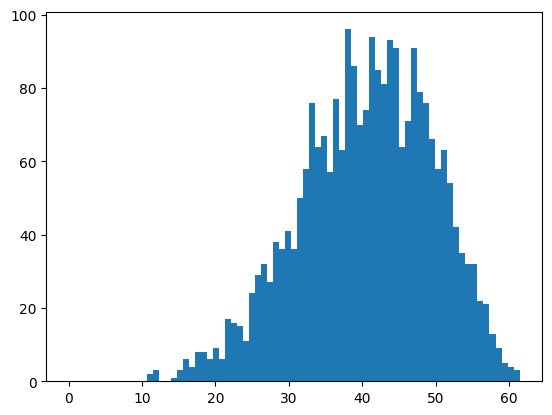

In [7]:
plt.hist(K, 75, range=(0, np.max(K)));

### Draw many samples

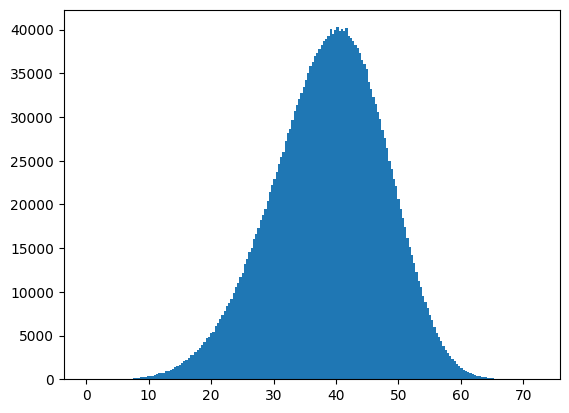

In [8]:
n_samples = 1000
K_samples = np.array([md.generate_sample() for _ in range(n_samples)]).T

plt.hist(K_samples.flatten(), bins=200, range=(0, np.max(K_samples)));

### [Q–Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

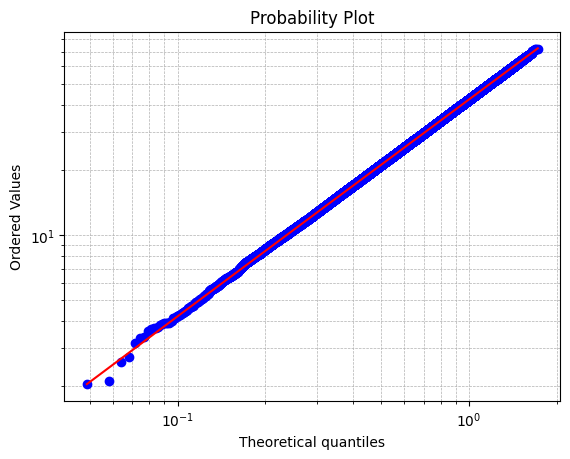

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(K_samples.flatten(), dist="weibull_min", sparams=(5,), plot=ax)
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

### Weibull Probability Plot